###  Principal Component Analysis ( PCA) 
is generally used as an unsupervised algorithm for reducing the data dimensions to address Curse of Dimensionality, detecting outliers, removing noise, speech recognition and other such areas.

The underlying algorithm in PCA is generally a linear algebra technique called Singular Value Decomposition (SVD). PCAs take the original data and create orthogonal components (uncorrelated components) that capture the information contained in the original data however with significantly less number of components.

Either the components themselves or  key loading of the components can be plugged in any further modeling work, rather than the original data to minimize information redundancy and noise.

There are three main ways to select the right number of components-

1. Number of components should explain at least 80% of the original data variance or information [Preferred One]
2. Eigen value of each PCA component should be more than or equal to 1. This means that they should express at least one variable worth of information
3. Elbow or Scree method- look for the elbow in the percentage of variance explained by each components and select the components where an elbow or kink is visible.

Please refer below to understad PCA with SPECTF dataset from UCI machine.


### Classify patients based on Cardiac health

**Dataset information**
[**SPECTF**](https://archive.ics.uci.edu/ml/machine-learning-databases/spect/) dataset from UCI machine learning repository

   The dataset describes diagnosing of cardiac Single Proton Emission Computed Tomography (SPECT) images.
   Each of the patients is classified into two categories: normal and abnormal.
   The database of 267 SPECT image sets (patients) was processed to extract features that summarize the original SPECT images.
   As a result, 44 continuous feature pattern was created for each patient.

**Number of Instances**: 267, **Number of Attributes**: 45 (44 continuous + 1 binary class)

All attributes are different regions of interest while in rest and stress.
1. OVERALL_DIAGNOSIS: 0,1 (class attribute, binary)
2. F1R: continuous (count in ROI (region of interest) 1 in rest)
3. F1S: continuous (count in ROI 1 in
4. F2R: continuous (count in ROI 2 in
5. F2S: continuous (count in ROI 2 in stress)
6. F3R: continuous (count in ROI 3 in
7. F3S: continuous (count in ROI 3 in
8. F4R: continuous (count in ROI 4 in
9. F4S: continuous (count in ROI 4 in stress)
10. F5R: continuous (count in ROI 5 in rest)
11. F5S: continuous (count in ROI 5 in
12. F6R: continuous (count in ROI 6 in)
13. F6S: continuous (count in ROI 6 in
14. F7R: continuous (count in ROI 7 in rest)
15. F7S: continuous (count in ROI 7 in stress)
16. F8R: continuous (count in ROI 8 in rest)
17. F8S: continuous (count in ROI 8 in stress)
18. F9R: continuous (count in ROI 9 in rest)
19. F9S: continuous (count in ROI 9 in
20. F10R: continuous (count in ROI 10 in
21. F10S: continuous (count in ROI 10 in stress)
22. F11R: continuous (count in ROI 11 in rest)
23. F11S: continuous (count in ROI 11 in stress
24. F12R: continuous (count in ROI 12 in
25. F12S: continuous (count in ROI 12 in stress)
26. F13R: continuous (count in ROI 13 in rest)
27. F13S: continuous (count in ROI 13 in stress)
28. F14R: continuous (count in ROI 14 in rest)
29. F14S: continuous (count in ROI 14 in stress)
30. F15R: continuous (count in ROI 15 in rest
31. F15S: continuous (count in ROI 15 in
32. F16R: continuous (count in ROI 16 in rest)
33. F16S: continuous (count in ROI 16 in stress)
34. F17R: continuous (count in ROI 17 in rest)
35. F17S: continuous (count in ROI 17 in stress)
36. F18R: continuous (count in ROI 18 in
37. F18S: continuous (count in ROI 18 in stress)
38. F19R: continuous (count in ROI 19 in rest)
39. F19S: continuous (count in ROI 19 in stress)
40. F20R: continuous (count in ROI 20 in rest)
41. F20S: continuous (count in ROI 20 in stress)
42. F21R: continuous (count in ROI 21 in rest)
43. F21S: continuous (count in ROI 21 in stress)
44. F22R: continuous (count in ROI 22 in rest)
45. F22S: continuous (count in ROI 22 in stress)

1. all continuous attributes have integer values from the 0 to 100
2. dataset is divided into:
   **training data** ("SPECTF.train" 80 instances)
   **testing data**  ("SPECTF.test" 187 instances)

3. We are using test dataset to just verift the PCA and lets see how we can reduce the attribute in the dataset which can explain more than 80% data variance

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import seaborn as sns
import time
import random
%matplotlib inline

In [2]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/spect/SPECTF.test"

In [3]:
### Dataset does not have column name mentioned so we need to manually add the column name while importing the data
col_name = ['target', 'F1R', 'F1S', 'F2R', 'F2S', 'F3R', 'F3S', 'F4R', 'F4S', 'F5R','F5S','F6R','F6S','F7R','F7S','F8R','F8S','F9R','F9S','F10R',
    'F10S',  'F11R','F11S','F12R','F12S','F13R','F13S','F14R','F14S','F15R','F15S','F16R','F16S','F17R','F17S','F18R','F18S','F19R','F19S',   'F20R',
    'F20S','F21R','F21S','F22R','F22S']

In [4]:
len(col_name)

45

In [5]:
df_spectf = pd.read_table(url,sep=",",names= col_name)

In [6]:
df_spectf.head()

,target,F1R,F1S,F2R,F2S,F3R,F3S,F4R,F4S,F5R,...,F18R,F18S,F19R,F19S,F20R,F20S,F21R,F21S,F22R,F22S
0,1,67,68,73,78,65,63,67,60,63,...,61,56,76,75,74,77,76,74,59,68
1,1,75,74,71,71,62,58,70,64,71,...,66,62,68,69,69,66,64,58,57,52
2,1,83,64,66,67,67,74,74,72,64,...,67,64,69,63,68,54,65,64,43,42
3,1,72,66,65,65,64,61,71,78,73,...,69,68,68,63,71,72,65,63,58,60
4,1,62,60,69,61,63,63,70,68,70,...,66,66,58,56,72,73,71,64,49,42


In [7]:
df_spectf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 45 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   target  187 non-null    int64
 1   F1R     187 non-null    int64
 2   F1S     187 non-null    int64
 3   F2R     187 non-null    int64
 4   F2S     187 non-null    int64
 5   F3R     187 non-null    int64
 6   F3S     187 non-null    int64
 7   F4R     187 non-null    int64
 8   F4S     187 non-null    int64
 9   F5R     187 non-null    int64
 10  F5S     187 non-null    int64
 11  F6R     187 non-null    int64
 12  F6S     187 non-null    int64
 13  F7R     187 non-null    int64
 14  F7S     187 non-null    int64
 15  F8R     187 non-null    int64
 16  F8S     187 non-null    int64
 17  F9R     187 non-null    int64
 18  F9S     187 non-null    int64
 19  F10R    187 non-null    int64
 20  F10S    187 non-null    int64
 21  F11R    187 non-null    int64
 22  F11S    187 non-null    int64
 23  F12R    187 non

In [8]:
df_spectf.shape

(187, 45)

In [9]:
type(df_spectf)

pandas.core.frame.DataFrame

Dataset has 187 records and 45 variables including target variable

In [10]:
## Now checks the correlation between the variables
df_spectf.corr()

,target,F1R,F1S,F2R,F2S,F3R,F3S,F4R,F4S,F5R,...,F18R,F18S,F19R,F19S,F20R,F20S,F21R,F21S,F22R,F22S
target,1.000000,-0.033205,-0.072310,-0.047347,-0.100783,-0.162407,-0.218370,-0.084463,-0.117129,-0.109763,...,-0.103840,-0.122409,-0.060936,-0.069405,-0.158235,-0.180498,-0.201578,-0.233921,-0.224858,-0.213390
F1R,-0.033205,1.000000,0.601643,0.380365,0.376806,0.184712,0.208528,0.599774,0.424983,0.549938,...,0.422417,0.330402,0.317041,0.255071,0.451074,0.327409,0.089097,0.097360,0.021205,0.050646
F1S,-0.072310,0.601643,1.000000,0.271874,0.455517,0.055241,0.317336,0.415818,0.519327,0.455041,...,0.377079,0.418680,0.299668,0.517828,0.396013,0.488027,0.088510,0.073545,0.016101,0.083307
F2R,-0.047347,0.380365,0.271874,1.000000,0.601705,0.166304,0.149028,0.300404,0.141069,0.246003,...,0.188291,0.139054,0.287469,0.195695,0.288137,0.223436,0.147974,0.116902,0.057365,0.084343
F2S,-0.100783,0.376806,0.455517,0.601705,1.000000,0.094517,0.226083,0.239487,0.233756,0.310953,...,0.178453,0.202181,0.155147,0.309793,0.263244,0.379087,0.137220,0.169305,0.103953,0.129407
F3R,-0.162407,0.184712,0.055241,0.166304,0.094517,1.000000,0.710749,0.262919,0.394523,0.231966,...,0.349090,0.299781,-0.022380,-0.110333,0.367660,0.225666,0.503053,0.464465,0.421015,0.398157
F3S,-0.218370,0.208528,0.317336,0.149028,0.226083,0.710749,1.000000,0.350626,0.656415,0.251063,...,0.483734,0.581697,0.020715,0.096611,0.455714,0.473037,0.638465,0.695800,0.491006,0.594700
F4R,-0.084463,0.599774,0.415818,0.300404,0.239487,0.262919,0.350626,1.000000,0.679731,0.595992,...,0.676583,0.551457,0.428249,0.254531,0.644387,0.468698,0.213282,0.228189,0.079135,0.160490
F4S,-0.117129,0.424983,0.519327,0.141069,0.233756,0.394523,0.656415,0.679731,1.000000,0.379337,...,0.701032,0.764119,0.210451,0.310271,0.663214,0.641950,0.429595,0.433020,0.277691,0.354779
F5R,-0.109763,0.549938,0.455041,0.246003,0.310953,0.231966,0.251063,0.595992,0.379337,1.000000,...,0.544854,0.423605,0.462315,0.368660,0.501115,0.367761,0.201297,0.167055,0.082002,0.133144


<AxesSubplot:>

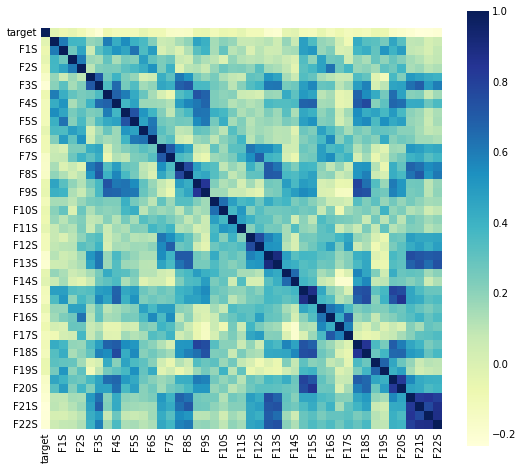

In [11]:
## Now visualise the co-relation
plt.figure(figsize = (8,8))
sns.heatmap(df_spectf.corr(),cmap="YlGnBu",vmax=1,square=True)

We can see from the above cor-relation that there are many variables are co-related.

In [12]:
## Now split the target variable and store as a separate
y = df_spectf["target"]
print(y.shape)
print(type(y))

(187,)
<class 'pandas.core.series.Series'>


In [13]:
## Now drop the target variable from the main dataset
X_spectf = df_spectf.drop("target",axis=1)

In [14]:
X_spectf.head()

,F1R,F1S,F2R,F2S,F3R,F3S,F4R,F4S,F5R,F5S,...,F18R,F18S,F19R,F19S,F20R,F20S,F21R,F21S,F22R,F22S
0,67,68,73,78,65,63,67,60,63,62,...,61,56,76,75,74,77,76,74,59,68
1,75,74,71,71,62,58,70,64,71,68,...,66,62,68,69,69,66,64,58,57,52
2,83,64,66,67,67,74,74,72,64,68,...,67,64,69,63,68,54,65,64,43,42
3,72,66,65,65,64,61,71,78,73,69,...,69,68,68,63,71,72,65,63,58,60
4,62,60,69,61,63,63,70,68,70,65,...,66,66,58,56,72,73,71,64,49,42


In [15]:
print(X_spectf.shape)
print(type(X_spectf))

(187, 44)
<class 'pandas.core.frame.DataFrame'>


In [16]:
## To solve the above warking lets strandadising the variables
from sklearn.preprocessing import StandardScaler
sdscaler = StandardScaler()
X_spectf_scaler = sdscaler.fit_transform(X_spectf)

In [17]:
X_spectf_scaler

array([[ 0.20940529,  0.41596002,  0.68734602, ...,  0.96547463,
         0.59118869,  1.28968911],
       [ 1.10446332,  1.00822796,  0.39455854, ..., -0.02516326,
         0.44098178,  0.22637971],
       [ 1.99952135,  0.02111472, -0.33741018, ...,  0.34632595,
        -0.61046658, -0.43818867],
       ...,
       [ 1.10446332,  0.90951664,  0.54095228, ...,  1.0273895 ,
         1.19201632,  1.48905963],
       [-0.68565274, -0.17630793,  0.54095228, ...,  1.08930437,
         1.41732668,  1.42260279],
       [-0.12624147,  0.21853737, -0.04462269, ...,  0.34632595,
         0.44098178,  0.35929338]])

In [18]:
X_spectf_scaler.shape

(187, 44)

In [19]:
pd.DataFrame(X_spectf_scaler).describe()

,0,1,2,3,4,5,6,7,8,9,...,34,35,36,37,38,39,40,41,42,43
count,1.870000e+02,1.870000e+02,1.870000e+02,1.870000e+02,1.870000e+02,1.870000e+02,1.870000e+02,1.870000e+02,1.870000e+02,1.870000e+02,...,1.870000e+02,1.870000e+02,1.870000e+02,1.870000e+02,1.870000e+02,1.870000e+02,1.870000e+02,1.870000e+02,1.870000e+02,1.870000e+02
mean,3.640878e-16,-2.803758e-16,-1.036975e-15,-7.269883e-16,-2.284269e-16,-1.006325e-16,-6.132943e-16,2.505423e-16,3.497277e-16,-2.932889e-16,...,-1.258649e-16,2.196698e-17,-3.143653e-16,-1.369968e-16,1.543626e-17,2.612289e-17,-1.542883e-16,4.393396e-17,1.944375e-16,-4.838673e-17
std,1.002685e+00,1.002685e+00,1.002685e+00,1.002685e+00,1.002685e+00,1.002685e+00,1.002685e+00,1.002685e+00,1.002685e+00,1.002685e+00,...,1.002685e+00,1.002685e+00,1.002685e+00,1.002685e+00,1.002685e+00,1.002685e+00,1.002685e+00,1.002685e+00,1.002685e+00,1.002685e+00
min,-4.713414e+00,-4.223472e+00,-4.436435e+00,-3.803929e+00,-4.486612e+00,-3.721763e+00,-5.096135e+00,-4.584952e+00,-5.307309e+00,-4.011480e+00,...,-5.243510e+00,-3.976695e+00,-4.031719e+00,-5.012607e+00,-4.042764e+00,-4.114733e+00,-3.603834e+00,-3.120907e+00,-2.863570e+00,-2.963549e+00
25%,-4.618882e-01,-5.217976e-01,-6.301977e-01,-3.680648e-01,-4.000801e-01,-3.360184e-01,-2.479871e-01,-2.394521e-01,-2.442356e-01,-3.552001e-01,...,-2.148220e-01,-1.413401e-01,-5.767757e-01,-5.302583e-01,-2.567220e-01,-3.066371e-01,-3.405483e-01,-3.037802e-01,-5.353631e-01,-4.381887e-01
50%,9.752303e-02,1.198260e-01,1.017711e-01,1.861068e-01,1.238343e-01,1.618853e-01,1.735910e-01,2.328848e-01,2.255341e-01,1.526165e-01,...,3.053872e-01,2.755463e-01,1.142130e-01,2.350208e-01,2.733239e-01,2.792238e-01,3.379566e-01,2.844111e-01,2.907749e-01,2.263797e-01
75%,6.569343e-01,6.133827e-01,6.873460e-01,6.294441e-01,6.477487e-01,6.597889e-01,5.951691e-01,6.107544e-01,5.387139e-01,6.604331e-01,...,6.521933e-01,6.090554e-01,6.167503e-01,6.723231e-01,6.519281e-01,6.453868e-01,7.256737e-01,6.559003e-01,6.662921e-01,7.580344e-01
max,1.999521e+00,1.600496e+00,2.004890e+00,1.737787e+00,1.905143e+00,1.655596e+00,1.649114e+00,1.177559e+00,1.373860e+00,1.574503e+00,...,1.461408e+00,1.276074e+00,1.873093e+00,1.656253e+00,1.257695e+00,1.377713e+00,1.371869e+00,1.460794e+00,2.318568e+00,1.489060e+00


In [20]:
## We will train our model using Logistic Regression and we will record the time taken to train the model
from sklearn.linear_model import LogisticRegressionCV
lg = LogisticRegressionCV(cv = 5,max_iter=4000)
### Pls check link for CV -- https://towardsdatascience.com/train-test-split-and-cross-validation-in-python-80b61beca4b6
start_time_lr = time.time()
lg.fit(X_spectf,y)
end_time_lr = time.time()
time_taken_before_PCA = end_time_lr - start_time_lr
print("Time taken to train the model with all the variables is {}.".format(time_taken_before_PCA))

Time taken to train the model with all the variables is 15.206230401992798.


### Apply the PCA

Principal component analysis is a statistical procedure that uses an **orthogonal transformation** to convert a set of observations of possibly **correlated variables** into a set of values of **linearly uncorrelated variables** called principal components
- With PCA we can reduce the dimentions with out losing much information
- PCA also helps to remove the multicollinearity between the variables

In [21]:
from sklearn.decomposition import PCA

In [22]:
type(X_spectf_scaler)

numpy.ndarray

In [23]:
pc = PCA()
pca = pc.fit(X_spectf_scaler)
X_pca_transform = pca.transform(X_spectf_scaler)

In [24]:
pc.explained_variance_

array([14.34562074,  5.83681585,  4.42162892,  2.34332289,  1.80650522,
        1.55240242,  1.45319376,  1.36726928,  1.29681023,  1.09713609,
        0.90936507,  0.7917635 ,  0.71012602,  0.65566146,  0.55558117,
        0.52786403,  0.46792461,  0.40259812,  0.33576864,  0.31605158,
        0.29306647,  0.28413263,  0.24971262,  0.23242124,  0.19851243,
        0.18062938,  0.17242752,  0.16469028,  0.15106954,  0.13134794,
        0.12212081,  0.11471285,  0.10372077,  0.09271628,  0.08059425,
        0.07867202,  0.07363336,  0.06858027,  0.05356435,  0.04941072,
        0.04523983,  0.04274213,  0.03500209,  0.02442975])

In [25]:
pc.explained_variance_ratio_

array([0.32429332, 0.13194552, 0.09995418, 0.05297254, 0.04083738,
       0.0350932 , 0.03285052, 0.03090813, 0.02931535, 0.02480157,
       0.02055687, 0.0178984 , 0.01605292, 0.01482171, 0.01255932,
       0.01193276, 0.01057778, 0.00910103, 0.0075903 , 0.00714458,
       0.00662498, 0.00642303, 0.00564494, 0.00525405, 0.00448752,
       0.00408326, 0.00389785, 0.00372295, 0.00341504, 0.00296922,
       0.00276063, 0.00259317, 0.00234468, 0.00209592, 0.00182189,
       0.00177844, 0.00166454, 0.00155031, 0.00121086, 0.00111697,
       0.00102268, 0.00096622, 0.00079125, 0.00055225])

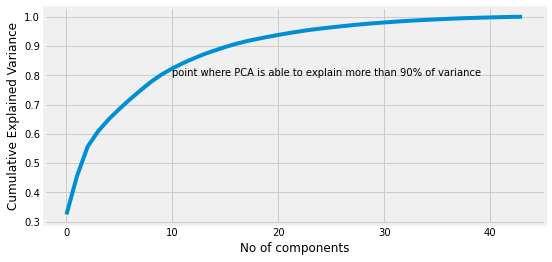

In [26]:
plt.figure(figsize= (8,4))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.ylabel("Cumulative Explained Variance")
plt.xlabel("No of components")
plt.annotate("point where PCA is able to explain more than 90% of variance",xy=(10,0.80))
plt.show()

we can see from the above graph that cumulative Explained Variance ratio helps us to select the principal components.
As we can observe that **10 Principal components** can explain **80% variance** in data

In [27]:
leng =len(X_spectf.columns)
leng

44

In [28]:
pca.explained_variance_.shape

(44,)

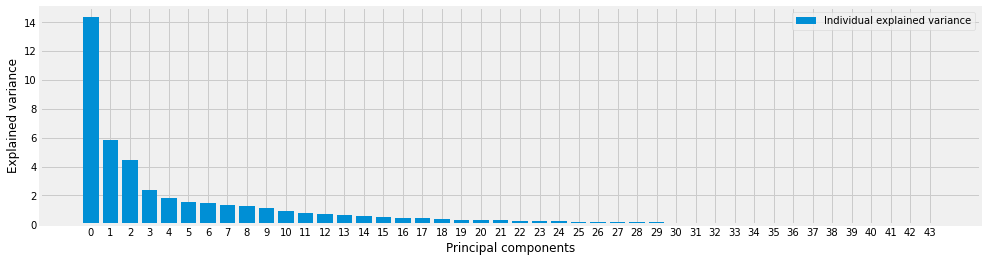

In [29]:
plt.figure(figsize=(15, 4))
plt.bar(range(leng),pca.explained_variance_,label='Individual explained variance')
plt.ylabel('Explained variance')
plt.xlabel('Principal components')
plt.xticks(range(leng))
plt.legend()

We can see from the above graph that using PCA we can transform linearly corelated variables into set of uncorelated variables. 


In [30]:
X_pca_transform.shape

(187, 44)

In [31]:
type(X_pca_transform)

numpy.ndarray

Text(0.5, 1.0, 'Correlation between different features')

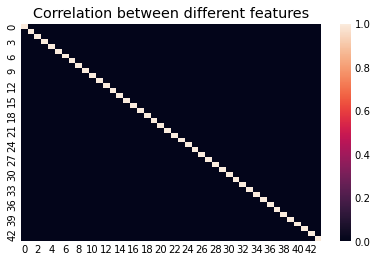

In [32]:
## Lets check the corelation using heatmap post PCA
sns.heatmap(pd.DataFrame(X_pca_transform).corr())
plt.title("Correlation between different features")

Lets again compare the Logistic Regresstion model using PCA components = 10, becuase they are able to explain more than 80% varinace in data

In [33]:
PC = PCA(n_components=10)
post_pca = PC.fit(X_spectf_scaler)
X_post_pca_transform = PC.transform(X_spectf_scaler)

In [34]:
X_post_pca_transform.shape

(187, 10)

In [35]:
type(X_post_pca_transform)

numpy.ndarray

In [36]:
post_lr = LogisticRegressionCV(cv = 5,max_iter=4000)
start_time = time.time()
post_lr.fit(X_post_pca_transform,y)
end_time = time.time()
print("Time taken to train the model with 10 Principal components {}".format(end_time-start_time))

Time taken to train the model with 10 Principal components 0.298123836517334


In [37]:
print("Time taken to train the model with all the variables is {}.".format(time_taken_before_PCA))
print("Time taken to train the model with 10 Principal components {}".format(end_time-start_time))

Time taken to train the model with all the variables is 15.206230401992798.
Time taken to train the model with 10 Principal components 0.298123836517334


In [38]:
## Lets calculate the how much variance we get using these 15 components
print("10 components are able to explain variance up to {}%".format(post_pca.explained_variance_ratio_.sum()*100))

10 components are able to explain variance up to 80.29717070481266%


In [39]:
## Calculagte the Eigen Value 
## Ideally we should take those components which have atleast more than 1 worth of variable's explainning power
## But as we know that we also need to count the our model should include all thsoe components which are able
## to explain more than 80% of data variance.
post_pca.explained_variance_

array([14.34562074,  5.83681585,  4.42162892,  2.34332289,  1.80650522,
        1.55240242,  1.45319376,  1.36726928,  1.29681023,  1.09713609])

### PCA_Random Forest

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import seaborn as sns
import time
import random
%matplotlib inline

In [41]:
## Lets import the same data set
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/spect/SPECTF.test"
col_name = ['target', 'F1R', 'F1S', 'F2R', 'F2S', 'F3R', 'F3S', 'F4R', 'F4S', 'F5R','F5S','F6R','F6S','F7R','F7S','F8R','F8S','F9R','F9S','F10R',
    'F10S',  'F11R','F11S','F12R','F12S','F13R','F13S','F14R','F14S','F15R','F15S','F16R','F16S','F17R','F17S','F18R','F18S','F19R','F19S',   'F20R',
    'F20S','F21R','F21S','F22R','F22S']

In [42]:
df_spectf = pd.read_csv(url,sep=",",names= col_name)

In [43]:
df_spectf.head()

,target,F1R,F1S,F2R,F2S,F3R,F3S,F4R,F4S,F5R,...,F18R,F18S,F19R,F19S,F20R,F20S,F21R,F21S,F22R,F22S
0,1,67,68,73,78,65,63,67,60,63,...,61,56,76,75,74,77,76,74,59,68
1,1,75,74,71,71,62,58,70,64,71,...,66,62,68,69,69,66,64,58,57,52
2,1,83,64,66,67,67,74,74,72,64,...,67,64,69,63,68,54,65,64,43,42
3,1,72,66,65,65,64,61,71,78,73,...,69,68,68,63,71,72,65,63,58,60
4,1,62,60,69,61,63,63,70,68,70,...,66,66,58,56,72,73,71,64,49,42


In [44]:
print(type(df_spectf))
print(df_spectf.shape)

<class 'pandas.core.frame.DataFrame'>
(187, 45)


In [45]:
df_spectf.describe()

,target,F1R,F1S,F2R,F2S,F3R,F3S,F4R,F4S,F5R,...,F18R,F18S,F19R,F19S,F20R,F20S,F21R,F21S,F22R,F22S
count,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,...,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000
mean,0.919786,65.128342,63.786096,68.304813,68.320856,63.818182,62.374332,69.352941,68.534759,62.839572,...,63.358289,61.695187,65.090909,63.850267,64.390374,62.187166,60.770053,58.406417,51.128342,48.593583
std,0.272353,8.961963,10.157746,6.849231,9.046697,9.569165,10.069062,9.513631,10.614082,9.604879,...,8.673589,12.025874,7.980977,9.171545,13.241857,13.691778,15.516746,16.194568,13.350712,15.087756
min,0.000000,23.000000,21.000000,38.000000,34.000000,21.000000,25.000000,21.000000,20.000000,12.000000,...,18.000000,14.000000,33.000000,18.000000,11.000000,6.000000,5.000000,8.000000,13.000000,4.000000
25%,1.000000,61.000000,58.500000,64.000000,65.000000,60.000000,59.000000,67.000000,66.000000,60.500000,...,61.500000,60.000000,60.500000,59.000000,61.000000,58.000000,55.500000,53.500000,44.000000,42.000000
50%,1.000000,66.000000,65.000000,69.000000,70.000000,65.000000,64.000000,71.000000,71.000000,65.000000,...,66.000000,65.000000,66.000000,66.000000,68.000000,66.000000,66.000000,63.000000,55.000000,52.000000
75%,1.000000,71.000000,70.000000,73.000000,74.000000,70.000000,69.000000,75.000000,75.000000,68.000000,...,69.000000,69.000000,70.000000,70.000000,73.000000,71.000000,72.000000,69.000000,60.000000,60.000000
max,1.000000,83.000000,80.000000,82.000000,84.000000,82.000000,79.000000,85.000000,81.000000,76.000000,...,76.000000,77.000000,80.000000,79.000000,81.000000,81.000000,82.000000,82.000000,82.000000,71.000000


Text(0.5, 1.0, 'Correlation between all variables')

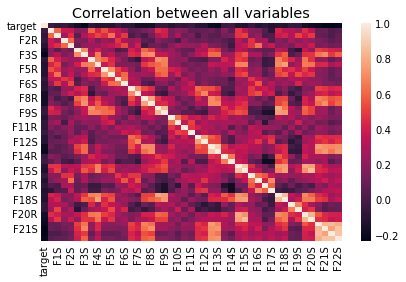

In [46]:
## Check the correlation 
sns.heatmap(df_spectf.corr())
plt.title("Correlation between all variables")

In [47]:
## Separate the Target and independent variables
y = df_spectf["target"]
y

0      1
1      1
2      1
3      1
4      1
      ..
182    0
183    0
184    0
185    0
186    0
Name: target, Length: 187, dtype: int64

In [48]:
print(y.shape)
print(type(y))

(187,)
<class 'pandas.core.series.Series'>


In [49]:
X = df_spectf.drop("target",axis=1)
X.head()

,F1R,F1S,F2R,F2S,F3R,F3S,F4R,F4S,F5R,F5S,...,F18R,F18S,F19R,F19S,F20R,F20S,F21R,F21S,F22R,F22S
0,67,68,73,78,65,63,67,60,63,62,...,61,56,76,75,74,77,76,74,59,68
1,75,74,71,71,62,58,70,64,71,68,...,66,62,68,69,69,66,64,58,57,52
2,83,64,66,67,67,74,74,72,64,68,...,67,64,69,63,68,54,65,64,43,42
3,72,66,65,65,64,61,71,78,73,69,...,69,68,68,63,71,72,65,63,58,60
4,62,60,69,61,63,63,70,68,70,65,...,66,66,58,56,72,73,71,64,49,42


In [50]:
print(X.shape)
print(type(X))

(187, 44)
<class 'pandas.core.frame.DataFrame'>


###### Lets see the difference Between 3 methods of feature scaling 
1. StandardScaler
2. MinMaxScaler
3. Normalizer


In [51]:
X_col_name = col_name
X_col_name.remove("target")

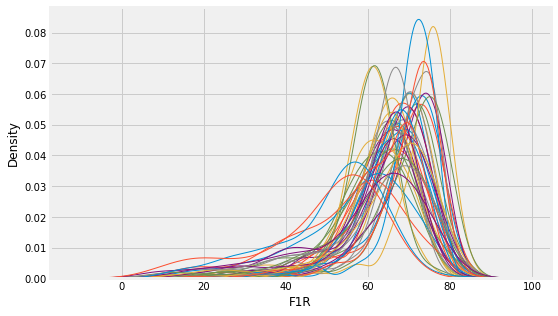

In [52]:
plt.figure(figsize=(8,5))
var = []
for i in X_col_name:
    sns.kdeplot(X[i],legend=False,linewidth=1.0)

#### StandardScaler

In [53]:
scale = StandardScaler()
scale.fit(X)
X_scale = scale.transform(X)

In [54]:
df_X_scale = pd.DataFrame(X_scale,columns= X_col_name)

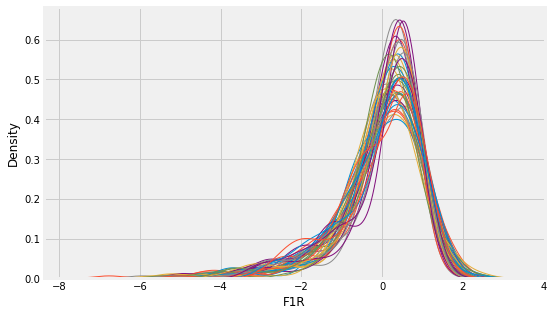

In [55]:
plt.figure(figsize=(8,5))
var = []
for i in X_col_name:
    sns.kdeplot(df_X_scale[i],legend=False,linewidth=1.0)

#### MinMaxScaler

In [56]:
from sklearn import preprocessing

In [57]:
minmax_scale = preprocessing.MinMaxScaler()
X_minmax_scale = minmax_scale.fit_transform(X)

In [58]:
X_minmax_scale.shape

(187, 44)

In [59]:
type(X_minmax_scale)

numpy.ndarray

In [60]:
df_X_minmax_scale = pd.DataFrame(X_minmax_scale,columns=X_col_name)

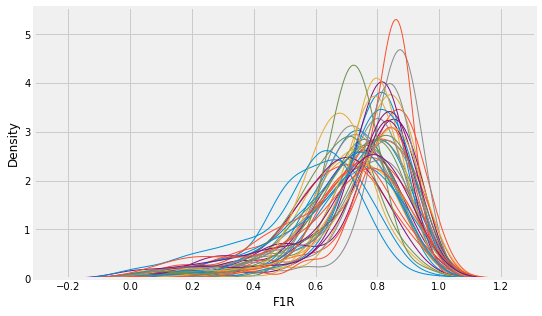

In [61]:
plt.figure(figsize=(8,5))
var = []
for i in X_col_name:
    sns.kdeplot(df_X_minmax_scale[i],legend=False,linewidth=1.0)

#### Normalizer

In [62]:
norm = preprocessing.Normalizer()
X_norm_scale = norm.fit_transform(X)

In [63]:
df_X_norm_scale = pd.DataFrame(X_norm_scale,columns=X_col_name)

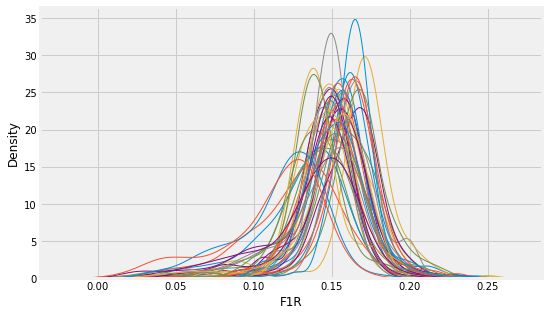

In [64]:
plt.figure(figsize=(8,5))
var = []
for i in X_col_name:
    sns.kdeplot(df_X_norm_scale[i],legend=False,linewidth=1.0)

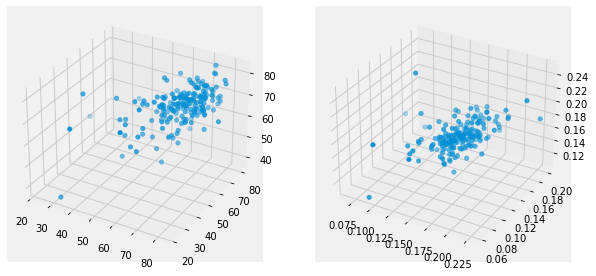

In [65]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(9, 5))
ax1 = fig.add_subplot(121, projection='3d')
ax2 = fig.add_subplot(122, projection='3d')
ax1.scatter(X['F1R'],X['F1S'],X['F2R'])
ax2.scatter(df_X_norm_scale['F1R'],df_X_norm_scale['F1S'],df_X_norm_scale['F2R'])
plt.show()

In [66]:
### Start the PCA and check the Random Forest Classifier

In [67]:
### Split the train and test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 42)

In [68]:
print(X_train.shape)
print(X_test.shape)
print(type(X_train))
print(type(X_test))

(130, 44)
(57, 44)
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [69]:
print(y_train.shape)
print(y_test.shape)
print(type(y_train))
print(type(y_test))

(130,)
(57,)
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


In [70]:
## We need to scale the data 
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
scale.fit(X_train)

StandardScaler()

In [71]:
X_train_scale = scale.transform(X_train)

In [72]:
X_test_scale= scale.transform(X_test)

In [73]:
print(X_train_scale.shape)
print(type(X_train_scale))

(130, 44)
<class 'numpy.ndarray'>


In [74]:
df_X_train_scale = pd.DataFrame(X_train_scale,columns= X_col_name)

In [75]:
print(X_test_scale.shape)
print(type(X_test_scale))

(57, 44)
<class 'numpy.ndarray'>


In [76]:
df_X_test_scale = pd.DataFrame(X_test_scale,columns= X_col_name)

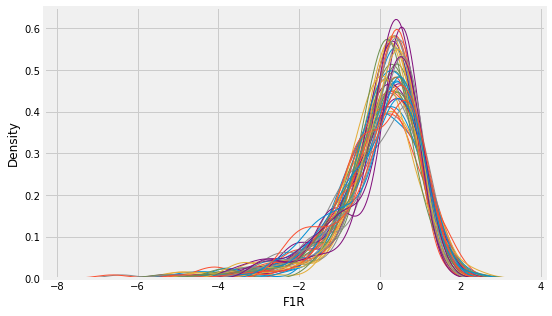

In [77]:
plt.figure(figsize=(8,5))
var = []
for i in X_col_name:
    sns.kdeplot(df_X_train_scale[i],legend=False,linewidth=1.0)

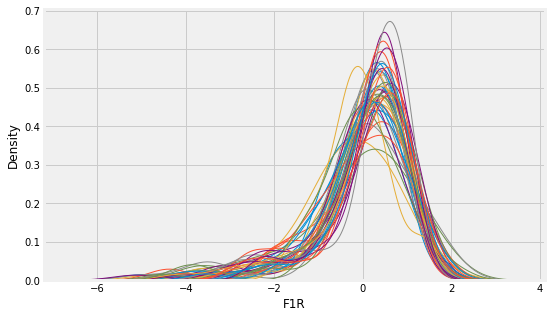

In [78]:
plt.figure(figsize=(8,5))
var = []
for i in X_col_name:
    sns.kdeplot(df_X_test_scale[i],legend=False,linewidth=1.0)

In [79]:
### Plot the explianed Variance ratio
from sklearn.decomposition import PCA
rf_pca = PCA()
X_pca = rf_pca.fit(X_train_scale)

In [80]:
X_pca.explained_variance_ratio_

array([0.30585578, 0.12781699, 0.10974447, 0.05512036, 0.04544264,
       0.04036707, 0.0379112 , 0.0323717 , 0.03056771, 0.02826313,
       0.02096176, 0.01999151, 0.0155406 , 0.01407338, 0.01181618,
       0.01123598, 0.00977292, 0.00890389, 0.00756443, 0.00664402,
       0.0061964 , 0.00579858, 0.00490574, 0.00433866, 0.00420473,
       0.00389851, 0.00345408, 0.00330259, 0.00292449, 0.00268808,
       0.00260957, 0.00211885, 0.00198191, 0.00171452, 0.00142257,
       0.00137233, 0.00126556, 0.00118292, 0.00111064, 0.00093351,
       0.00082017, 0.00068633, 0.00063611, 0.00046743])

Text(0, 0.5, 'Cumulative explained variance ratio')

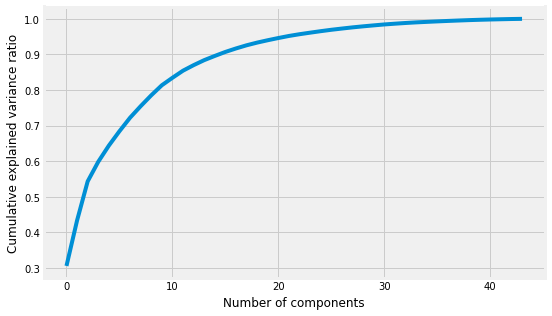

In [81]:
plt.figure(figsize=(8,5))
plt.plot(np.cumsum(X_pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance ratio')

In [82]:
X_pca_rf = X_pca.transform(X_train_scale)

In [83]:
df_X_pca_rf = pd.DataFrame(X_pca_rf,columns= X_col_name)

Text(0.5, 1.0, 'Correlation between different features')

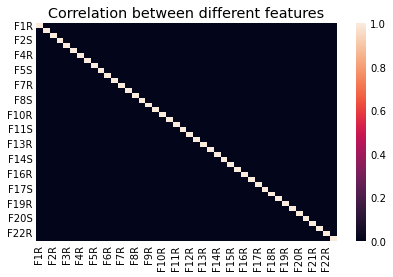

In [84]:
### plot the Correlation after PCA
sns.heatmap(df_X_pca_rf.corr())
plt.title('Correlation between different features')

In [85]:
### lets consider total 10 components as per the above Cumulative explained variance plot, are able to explain more
### than 80% of data variance.
rf_pca_10 = PCA(n_components=10)
rf_pca_10.fit(X_train_scale)

PCA(n_components=10)

In [86]:
X_pca_rf_10_train = rf_pca_10.transform(X_train_scale)

In [87]:
#rf_pca_10_test = PCA(n_components=10)
#X_pca_10_test = rf_pca_10_test.fit(X_test_scale)
X_pca_rf_10_test = rf_pca_10.transform(X_test_scale)

In [88]:
df_X_pca_rf_10 = pd.DataFrame(X_pca_rf_10_train)

Text(0.5, 1.0, 'Correlation between different features')

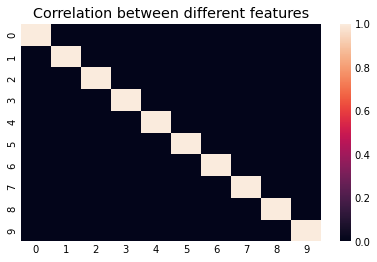

In [89]:
### plot the Correlation after PCA
sns.heatmap(df_X_pca_rf_10.corr())
plt.title('Correlation between different features')

In [90]:
### Apply Random Foreset Classifier
from sklearn.ensemble import RandomForestClassifier

In [91]:
RFC = RandomForestClassifier(max_depth= 5, min_samples_split= 2, n_estimators=20, random_state=1)
start_time = time.time()
X_RFC = RFC.fit(X_pca_rf_10_train,y_train)
end_time = time.time()
print("Time taken to train the model with 10 components is {}.".format(end_time-start_time))

Time taken to train the model with 10 components is 0.06446242332458496.


In [92]:
X_RFC.score(X_pca_rf_10_train,y_train)

0.9692307692307692

In [93]:
### Now test the Model using X_test data
Y_pca_rf_10_pred = X_RFC.predict(X_pca_rf_10_test)

In [94]:
Y_pca_rf_10_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [95]:
from sklearn import metrics

In [96]:
X_pca_rf_10_test.shape

(57, 10)

In [97]:
Y_pca_rf_10_pred.shape

(57,)

In [98]:
metrics.accuracy_score(y_test,Y_pca_rf_10_pred)

0.9298245614035088

In [99]:
print(metrics.classification_report(y_test,Y_pca_rf_10_pred,zero_division=0))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.93      1.00      0.96        53

    accuracy                           0.93        57
   macro avg       0.46      0.50      0.48        57
weighted avg       0.86      0.93      0.90        57

